# 이분 탐색

- 전제조건 : 배열 내부의 데이터가 정렬되어 있음
- 탐색 범위를 절반씩 좁혀가며 데이터를 탐색함
- 시작점, 끝점, 중간점을 사용
- 찾으려는 데이터와 중간점을 반복적으로 비교함
- 시간 복잡도 : $O(\log N)$

# 예시
- 찾고 싶은 데이터 : 4

1. 시작점, 끝점, 중간점(소수점인 경우 버림)을 정함
2. 중간점이 더 크므로 끝점을 중간점 바로 이전으로 옮겨줌
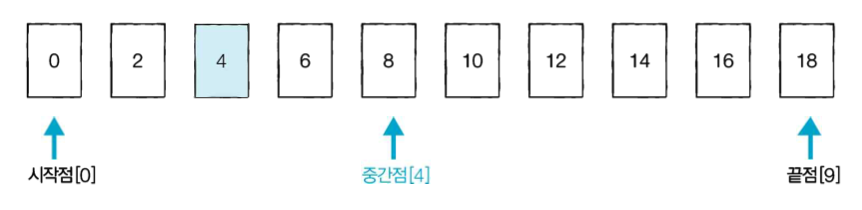

3. 새로운 중간점은 데이터보다 작으므로 시작점을 중간점 바로 이후로 변경
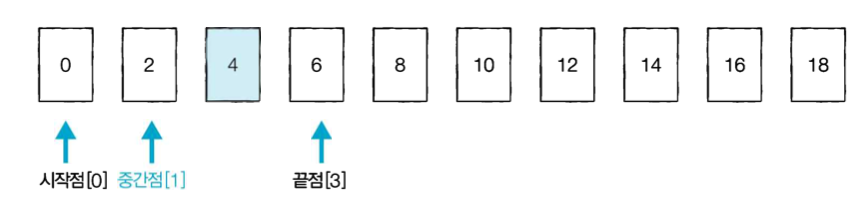

4. 새롭게 정해진 중간점이 찾으려는 데이터와 같으므로 탐색 종료
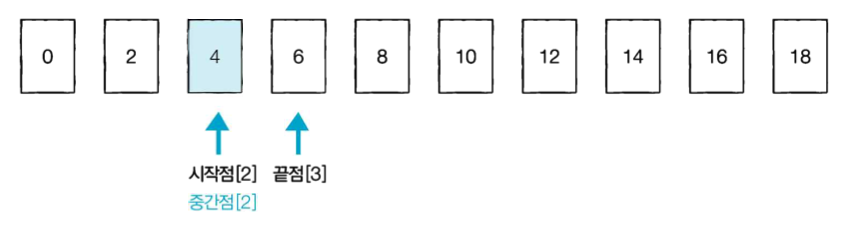

# 1) 재귀 함수로 구현

In [31]:
def binary_search(array, target, start, end):
    if start > end:
        return None
    # 중간점 계산
    mid = (start + end) // 2
    print(f"start: array[{start}]={array[start]},",
          f"mid: array[{mid}]={array[mid]},",
          f"end: array[{end}]={array[end]}"
         )
    # 종료조건 : 중간값이 찾고자 하는 값과 같음
    if array[mid] == target:
        return mid
    # 중간값이 타겟값보다 크면 끝점을 중간값 바로 이전으로 옮겨줌
    elif array[mid] > target:
        return binary_search(array, target, start, mid - 1)
    # 중간값이 타겟값보다 작으면(나머지 경우) 시작점을 중간값 바로 이후로 옮겨줌
    else:
        return binary_search(array, target, mid + 1, end)

In [35]:
array = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
result = binary_search(array, 4, 0, len(array) - 1)
if result is not None:
    print("찾는 원소의 인덱스: ", result)
else:
    print("원소가 존재하지 않음")

start: array[0]=0, mid: array[4]=8, end: array[9]=18
start: array[0]=0, mid: array[1]=2, end: array[3]=6
start: array[2]=4, mid: array[2]=4, end: array[3]=6
찾는 원소의 인덱스:  2


# 2) while문으로 구현

In [36]:
def binary_search(array, target, start, end):
    while start <= end:
        # 중간점 계산
        mid = (start + end) // 2
        print(f"start: array[{start}]={array[start]},",
              f"mid: array[{mid}]={array[mid]},",
              f"end: array[{end}]={array[end]}"
             )
        # 종료조건 : 중간값이 찾고자 하는 값과 같음
        if array[mid] == target:
            return mid
        # 중간값이 타겟값보다 크면 끝점을 중간값 바로 이전으로 옮겨줌
        elif array[mid] > target:
            end = mid - 1
        # 중간값이 타겟값보다 작으면(나머지 경우) 시작점을 중간값 바로 이후로 옮겨줌
        else:
            start = mid + 1
    return None

In [37]:
array = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
result = binary_search(array, 4, 0, len(array) - 1)
if result is not None:
    print("찾는 원소의 인덱스: ", result)
else:
    print("원소가 존재하지 않음")

start: array[0]=0, mid: array[4]=8, end: array[9]=18
start: array[0]=0, mid: array[1]=2, end: array[3]=6
start: array[2]=4, mid: array[2]=4, end: array[3]=6
찾는 원소의 인덱스:  2


# 이분 탐색 라이브러리(bisect)

> - bisect.bisect_left(a, x, lo=0, hi=len(a), *, key=None) : 정렬된 상태를 유지하면서 x가 들어갈 가장 왼쪽 자리를 찾아줌  
> - bisect.bisect(a, x, lo=0, hi=len(a), *, key=None),  
>   bisect.bisect_right(a, x, lo=0, hi=len(a), *, key=None) : 정렬된 상태를 유지하면서 x가 들어갈 가장 오른쪽 자리를 찾아줌
- 파이썬에서는 이분 탐색 라이브러리 bisect가 구현되어 있음
- 주의할 점 : bisect(bisect_right)는 찾는 항목 뒤의 삽입 위치를 반환
- bisect_left : 아까 구현한 이분 탐색과 같은 결과값

In [39]:
import bisect
array = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
print(bisect.bisect(array, 4))

3


In [41]:
from bisect import bisect_left, bisect_right
print(bisect.bisect_left(array, 4))
print(bisect.bisect_right(array, 4))

2
3


# 예시 문제

### 1. 떡볶이 떡 만들기
- 절단기의 높이(H)를 지정하여 줄지어진 떡을 한 번에 절단
- 높이가 H보다 크면 잘리고, 낮으면 안 잘림
- 19, 14, 10, 17cm인 떡이 있으면 절단이 높이가 15cm일 때 자른 뒤의 높이는  
  15, 14, 10, 15cm가 되고 잘린 떡의 길이는 4, 0, 0, 2cm
- 손님은 6cm의 길이를 가져감
- 떡의 개수 N, 요청한 떡의 길이가 M일 때 적어도 M만큼의 떡을 얻기 위해 설정할 수 있는 높이(H)의 최댓값은?

> 입력 조건 : 1 <= N <= 1,000,000 , 1 <= M <= 2,000,000,000  
> 출력 조건 : 0 <= H <= 1,000,000,000

1. 시작점 : 0, 끝점 : 19(떡의 최대 길이), 중간점 : (0 + 19) // 2 = 9  
   얻을 수 있는 떡의 합 : 25 -> 시작점 증가
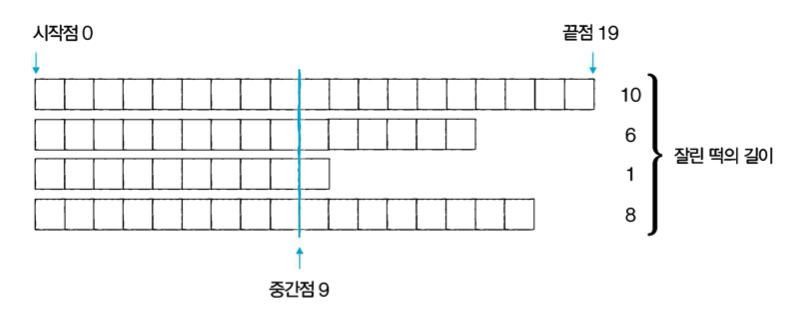

2. 시작점 : 10, 끝점 : 19, 중간점 : 14  
   얻을 수 있는 떡의 합 : 9 -> 시작점 증가
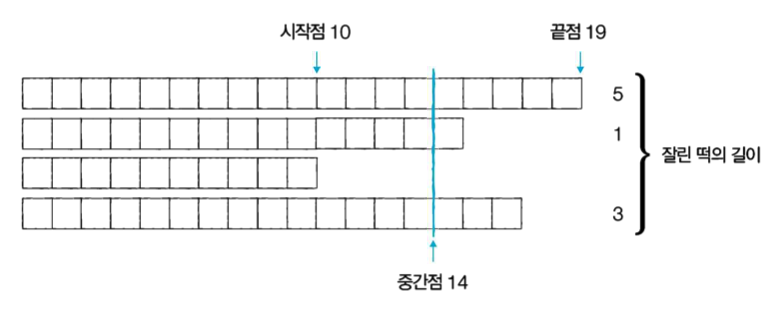

3. 시작점 : 15, 끝점 : 19, 중간점 : 17  
   얻을 수 있는 떡의 합 : 2 -> 끝점 감소
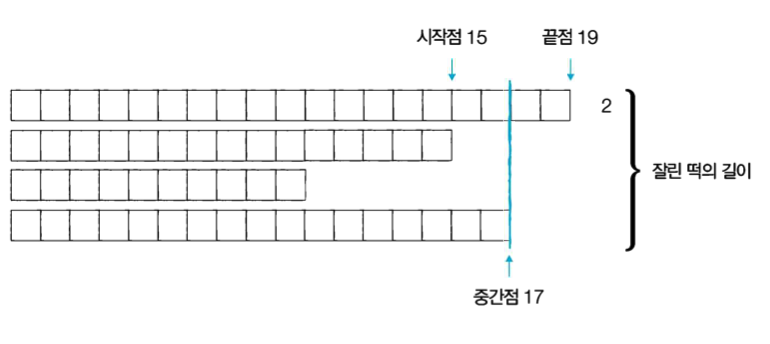

4. 시작점 : 15, 끝점 : 16, 중간점 : 15
   얻을 수 있는 떡의 합 : 6
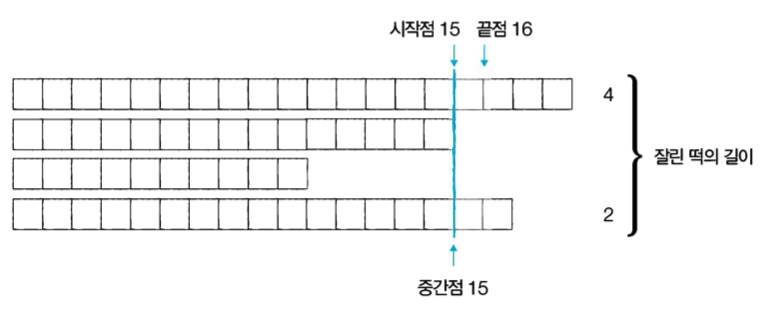
5. 시작점 : 16, 끝점 : 16, 중간점 : 16
   얻을 수 있는 떡의 합 : 4

6. 시작점 : 16, 끝점 : 15 -> 종료

In [54]:
def solution(array, n, m):
    start = 0
    end = max(array)
    
    # 이진 탐색 수행
    result = 0
    while(start <= end):
        print(end)
        total = 0
        mid = (start + end) // 2
        for x in array:
            # 잘랐을 때의 떡의 양
            if x > mid:
                total += x - mid
        # 떡의 양이 부족한 경우 더 많이 자르기(왼쪽 부분 탐색)
        if total < m:
            end = mid - 1
        # 떡의 양이 충분한 경우 덜 자르기(오른쪽 부분 탐색)
        else:
            # 우선 result에 넣고 끝날 때까지 계속 갱신해주면 최대한 덜 잘랐을 때가 들어감
            result = mid
            start = mid + 1
    
    return result

In [55]:
array = [19, 15, 10, 17]
solution(array, 4, 6)

19
19
19
16
16


15

### 2. Number of Flowers in Full Bloom

- 꽃이 피는 시점과 꽃이 지는 시점이 주어짐
- 사람이 찾아온 시점에 몇 개의 꽃이 피어있을 지 찾는 문제
- flowers와 persons의 순서는 신경 쓸 필요가 없으므로 정렬
- bisect_left와 bisect_right를 사용하면 쉽게 풀 수 있음
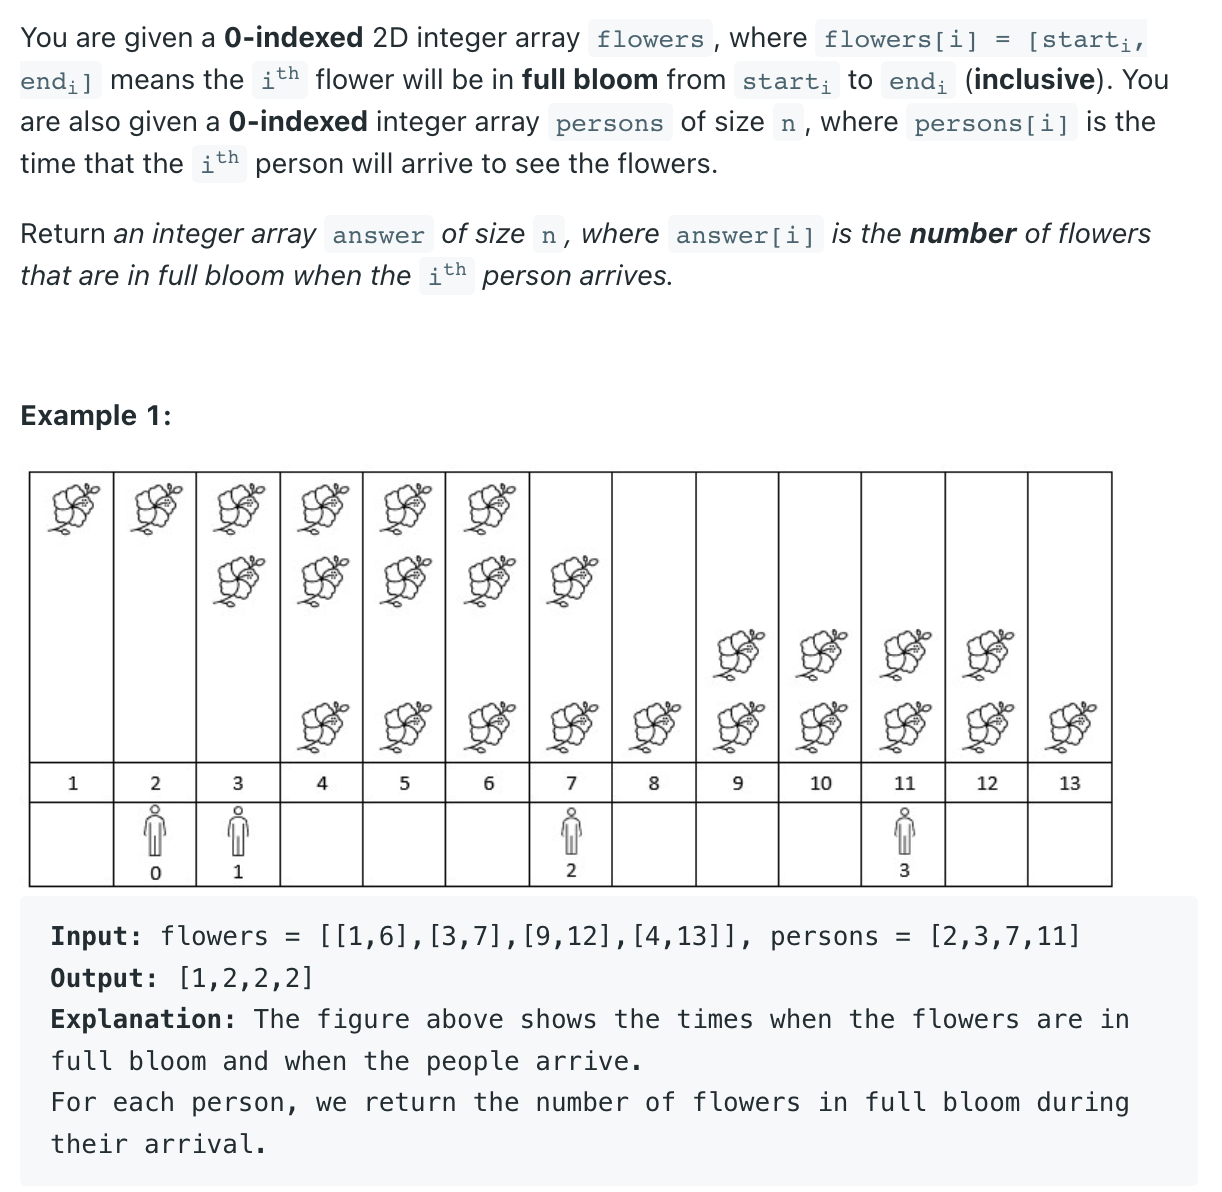

In [44]:
from bisect import bisect_left, bisect_right


def fullBloomFlowers(flowers, persons):
    answer = []
    # 꽃이 피는 시간을 정렬해서 flowers_s에 저장
    flowers_s = [i for i, j in sorted(flowers)]
    # 꽃이 지는 시간을 정렬해서 flowers_e에 저장
    flowers_e = [j for i, j in sorted(flowers, key=lambda x: x[1])]
    # 사람이 온 시점에 꽃의 개수 = 사람이 온 시점에 꽃이 핀 개수(인덱스) - 사람이 온 시점에 꽃이 진 개수(인덱스)
    # 이 때 bisect를 이용하는데, 사람이 온 시점에 꽃이 핀 개수는
    # 그 시점의 인덱스보다 오른쪽에서 찾아야 하므로 bisect_right로 구함
    for person in persons:
        answer.append(bisect_right(flowers_s, person) -
                      bisect_left(flowers_e, person))
    return answer


In [45]:
flowers = [[1,6],[3,7],[9,12],[4,13]]
persons = [2,3,7,11]
fullBloomFlowers(flowers, persons)

[1, 2, 2, 2]

# 풀어야 할 문제
- 43238_입국심사(https://school.programmers.co.kr/learn/courses/30/lessons/43238)
- 43236_징검다리(https://school.programmers.co.kr/learn/courses/30/lessons/43236)
